In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
x_data = np.linspace(0,10,1000000)

In [6]:
noise = np.random.randn(len(x_data))

In [7]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b

b = 5

In [8]:
y_true = 0.5*x_data + 5 + noise

In [10]:
x_df = pd.DataFrame(x_data, columns=['X Data'])

In [11]:
y_df = pd.DataFrame(y_true, columns=['Y'])

In [13]:
my_data = pd.concat([x_df, y_df], axis=1)

In [14]:
my_data.head()

,X Data,Y
0,0.00000,6.683170
1,0.00001,4.752556
2,0.00002,5.598069
3,0.00003,5.576236
4,0.00004,6.089903


In [15]:
my_data.shape

(1000000, 2)

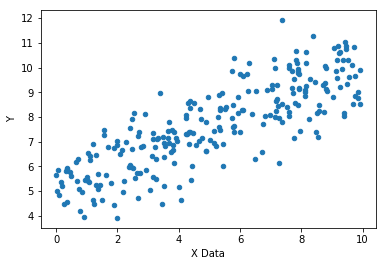

In [18]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [19]:
batch_size = 8

In [20]:
np.random.randn(2)

array([0.64414837, 1.71826529])

In [21]:
m = tf.Variable(0.64)
b = tf.Variable(1.72)

In [22]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [25]:
y_model = m*xph+b

In [26]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [28]:
init = tf.global_variables_initializer()

In [47]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [48]:
model_m

0.5147335

In [49]:
model_b

5.0467086

In [50]:
y_hat = x_data*model_m+model_b

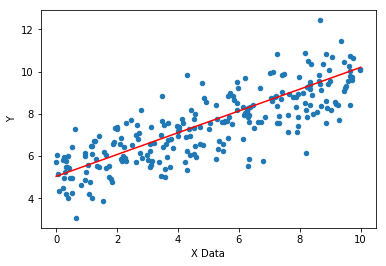

In [51]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')